<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_summer_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

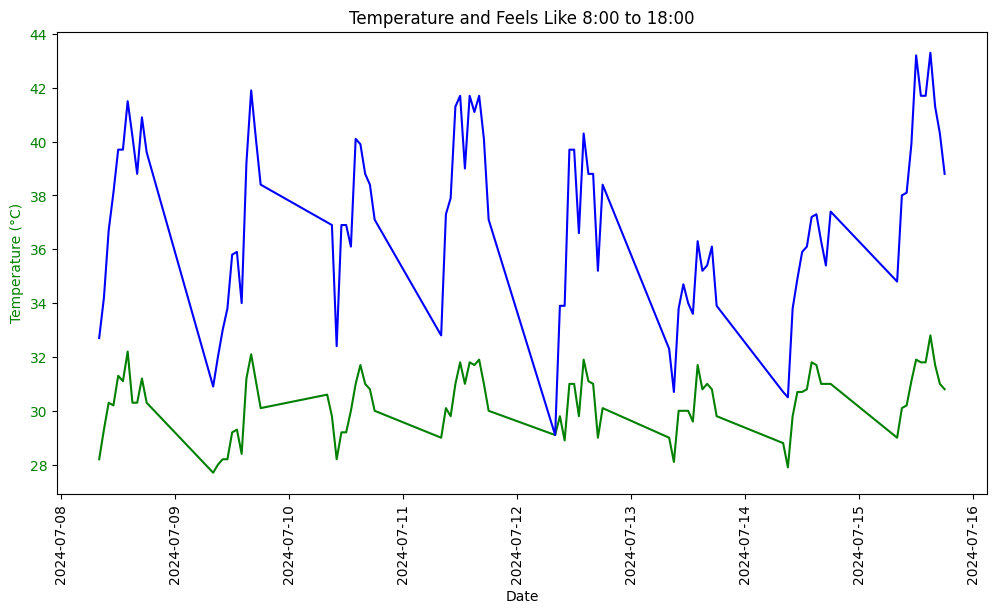

In [62]:
import pandas as pd
import matplotlib.pyplot as plt



# Read data from CSV files
df = pd.read_csv('https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/stats/paphos.csv',
                 parse_dates=['datetime'], index_col='datetime')



df=df.between_time('08:00', '18:00')


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['temp'], 'g', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='g')
ax1.tick_params(axis='y', labelcolor='g')


ax1.plot(df.index, df['feelslike'], 'b', label='Feels Lile')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Temperature and Feels Like 8:00 to 18:00')

# Show plot
plt.show()


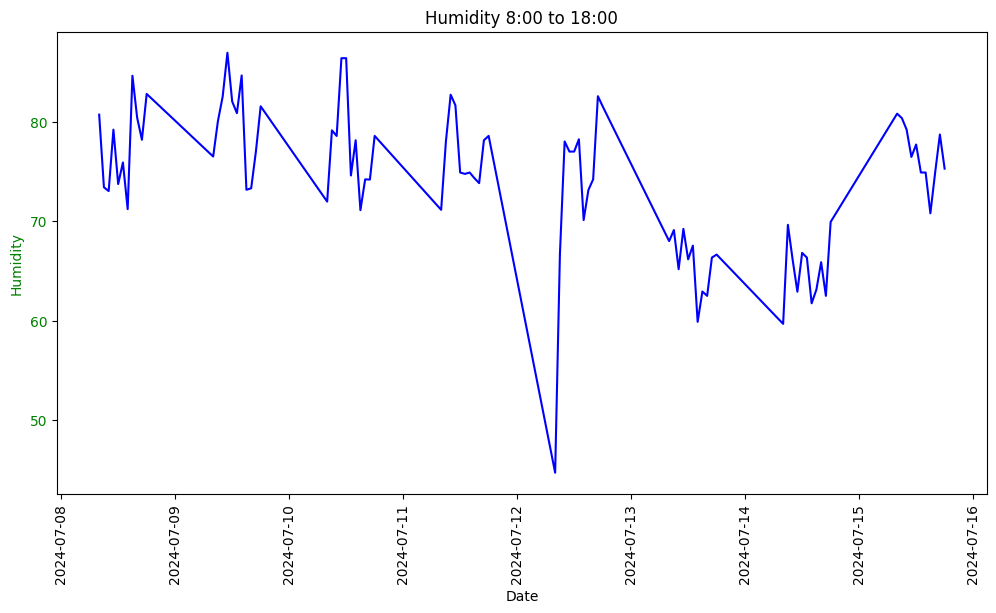

In [63]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature
ax1.plot(df.index, df['humidity'], 'b', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity', color='g')
ax1.tick_params(axis='y', labelcolor='g')



# Rotate x-ticks
plt.xticks(rotation=90)

# Add title
plt.title('Humidity 8:00 to 18:00')

# Show plot
plt.show()

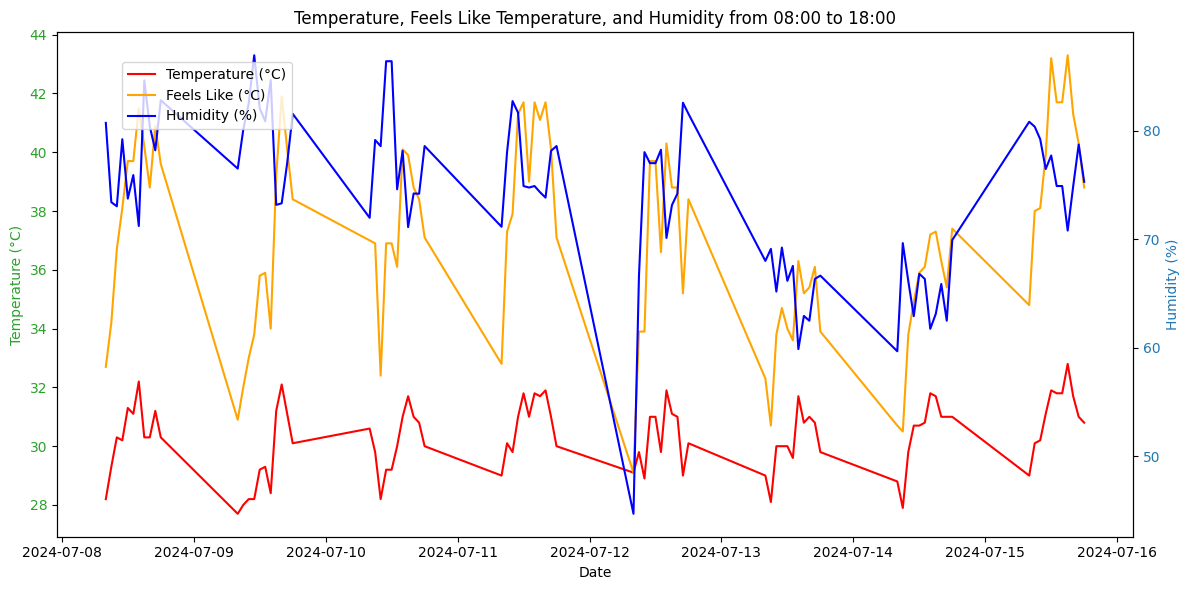

In [70]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))



# Plot temperature and feels like temperature on primary Y-axis without markers
ax1.plot(df.index, df['temp'], 'r', label='Temperature (°C)')
ax1.plot(df.index, df['feelslike'], 'orange', label='Feels Like (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Creating secondary Y-axis for Humidity without markers
ax2 = ax1.twinx()
ax2.plot(df.index, df['humidity'], 'b', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title
plt.title('Temperature, Feels Like Temperature, and Humidity from 08:00 to 18:00')

# Rotate x-ticks
plt.xticks(rotation=90)

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Displaying the chart
plt.tight_layout()
plt.show()